<a href="https://colab.research.google.com/github/ShubhamMishra1102/Course/blob/master/Group_Facilitator_SumaiyaK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color = green>Lending Club Case Study</font>

##  <font color = blue> Problem Statement </font>

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

##  <font color = blue> Business Understanding </font>

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png">
<center> <b>Figure 1. Loan Data Set</b> </center>
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


##  <font color = blue> Business Objectives </font>
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.



Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.



If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.



In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.




##  <font color = blue> Importing packages </font>

- <b> Pandas </b> is a software library written for the Python programming language for data manipulation and analysis
- <b> Matplotlib </b> is a comprehensive library for creating static, animated, and interactive visualizations in Python
- <b> Seaborn </b> is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
- <b> NumPy </b> (pronounced /ˈnʌmpaɪ/ (NUM-py) or sometimes /ˈnʌmpi/[3][4] (NUM-pee)) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


In [1]:
#Pandas as pd
import pandas as pd

#Matplotlib as plt
import matplotlib.pyplot as plt

#Seaborn as sns
import seaborn as sns

#NumPy as np
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns', None)

### Load and Read Existing Loan Data

In [164]:
#read_csv is a method to read CSV files in Pandas
loan_data = pd.read_csv('loan.csv', index_col=False, dtype='unicode')

In [165]:
#head return first 5 rows of Dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

## Data Analysis

In [166]:
#Shape of data set
loan_data.shape

#There are totally 39717 of rows and 111 columns in the Loan dataset

(39717, 111)

In [167]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [168]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [169]:
# Checking the different values and its ratio of the  target column
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [170]:
# Checking for the unique values in all the columns
loan_data.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


## Data Cleaning

In [171]:
#Checking the existing null values in the Dataset
print(loan_data.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [172]:
#Checking the existing null values in the Dataset - Percentage
print(round(100*(loan_data.isnull().sum()/len(loan_data.index)),2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [173]:
#Adding a new column for null value missing
null_value_perc=loan_data.isnull().sum() * 100 / len(loan_data)

In [174]:
null_value_data = pd.DataFrame({'column': loan_data.columns,
                                 'missing_value_Perc': null_value_perc.round(2)})
null_value_data.sort_values('missing_value_Perc', inplace=True)

In [175]:
null_value_data.shape

(111, 2)

In [176]:
(null_value_data.missing_value_Perc == 100.00).sum()
# 54 columns have all NULL values. Drop them

54

In [177]:
# List of columns having NULL values
null_value_columns = null_value_data[(null_value_data.missing_value_Perc == 100.00)].column.tolist()
null_value_columns

['num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_ut

In [192]:
# Dropping columns having all missing values
filtered_loandata = loan_data.drop(null_value_columns, axis=1)

In [193]:
filtered_loandata.shape
#from 111 to 57 columns. Lets recheck the Null values

(39717, 57)

In [194]:
print(round(100*(filtered_loandata.isnull().sum()/len(filtered_loandata.index)),2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [195]:
filtered_loandata.shape

(39717, 57)

### Now we have 57 columns out of which some correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [197]:
filtered_loandata.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [199]:
# Check percentage of missing data
((filtered_loandata.isnull().sum() * 100 / len(filtered_loandata)).sort_values(
    ascending=False))

emp_length                    2.706650
pub_rec_bankruptcies          1.754916
collections_12_mths_ex_med    0.140998
revol_util                    0.125891
tax_liens                     0.098195
earliest_cr_line              0.000000
delinq_amnt                   0.000000
acc_now_delinq                0.000000
application_type              0.000000
policy_code                   0.000000
initial_list_status           0.000000
total_acc                     0.000000
pub_rec                       0.000000
open_acc                      0.000000
inq_last_6mths                0.000000
loan_amnt                     0.000000
funded_amnt_inv               0.000000
purpose                       0.000000
pymnt_plan                    0.000000
loan_status                   0.000000
issue_d                       0.000000
verification_status           0.000000
annual_inc                    0.000000
home_ownership                0.000000
sub_grade                     0.000000
grade                    

In [200]:
filtered_loandata.shape

(39717, 30)

In [202]:
filtered_loandata.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans.
- To exclude that data , removing the records with current loan status

In [203]:
filtered_loandata = filtered_loandata[filtered_loandata.loan_status != "Current"]
filtered_loandata.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [204]:
# Missing value imputation
filtered_loandata.emp_length = filtered_loandata.emp_length.fillna('10+ years')

In [205]:
# Dropping the missing values as they are less in numbers and we also have huge amount of data
filtered_loandata = filtered_loandata.dropna(subset=['revol_util'])

In [245]:
print("Mode : " + filtered_loandata.emp_length.mode()[0])
filtered_loandata.emp_length.value_counts()

Mode : 10+ years


10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [253]:
filtered_loandata.emp_length.fillna(filtered_loandata.emp_length.mode()[0], inplace = True)
filtered_loandata.emp_length.isna().sum()

0

In [255]:
# Rechecking for the missing values
filtered_loandata.isnull().sum().sort_values(ascending = False)

pub_rec_bankruptcies          697
collections_12_mths_ex_med     56
tax_liens                      39
loan_amnt                       0
policy_code                     0
application_type                0
acc_now_delinq                  0
delinq_amnt                     0
term_months                     0
total_acc                       0
int_rate_perc                   0
revol_util_perc                 0
issue_d_month                   0
issue_d_year                    0
earliest_cr_line_month          0
earliest_cr_line_year           0
initial_list_status             0
pub_rec                         0
funded_amnt_inv                 0
verification_status             0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
issue_d                         0
open_acc                        0
loan_status                     0
pymnt_plan    

In [256]:
filtered_loandata.columns

Index(['loan_amnt', 'funded_amnt_inv', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'term_months', 'int_rate_perc',
       'revol_util_perc', 'issue_d_month', 'issue_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'annual_inc_lakhs'],
      dtype='object')

### Now the dataset is clean and has no null/missing values as the complete replacement and imputation is done

In [257]:
filtered_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   38527 non-null  float64 
 1   funded_amnt_inv             38527 non-null  float64 
 2   installment                 38527 non-null  float64 
 3   grade                       38527 non-null  category
 4   sub_grade                   38527 non-null  category
 5   emp_length                  38527 non-null  object  
 6   home_ownership              38527 non-null  category
 7   annual_inc                  38527 non-null  float64 
 8   verification_status         38527 non-null  category
 9   issue_d                     38527 non-null  object  
 10  loan_status                 38527 non-null  category
 11  pymnt_plan                  38527 non-null  object  
 12  purpose                     38527 non-null  category
 13  dti             

In [258]:
# Updating the datatypes
columns_float = ['loan_amnt', 'installment', 'annual_inc', 'dti']
filtered_loandata[columns_float] = filtered_loandata[columns_float].astype(np.float)

### Recreating the columns to proper data type derivation

In [260]:
filtered_loandata['int_rate_perc'] = filtered_loandata['int_rate'].str.rstrip('%')
del filtered_loandata['int_rate']

KeyError: ignored

In [215]:
filtered_loandata['revol_util_perc'] = filtered_loandata['revol_util'].str.rstrip('%')
del filtered_loandata['revol_util']

In [216]:
filtered_loandata['issue_d_month'], filtered_loandata['issue_d_year'] = filtered_loandata[
    'issue_d'].str.split('-').str

filtered_loandata['earliest_cr_line_month'], filtered_loandata['earliest_cr_line_year'] = filtered_loandata[
    'earliest_cr_line'].str.split('-').str

In [217]:
columns_int = ['total_acc', 'term_months', 'issue_d_year']
filtered_loandata[columns_int] = filtered_loandata[columns_int].astype(np.int)

In [220]:
columns_obj = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose',
               'inq_last_6mths', 'open_acc', 'pub_rec']
filtered_loandata[columns_obj] = filtered_loandata[columns_obj].apply(lambda x: x.astype('category'))

In [221]:
filtered_loandata['annual_inc_lakhs'] = filtered_loandata['annual_inc'] / 1000

### Evaluating the Numerical, Categorical and Object data

In [222]:
numeric_loandata = filtered_loandata.select_dtypes(include = [np.number])

categorical_loandata = filtered_loandata.select_dtypes(exclude = [np.number, np.object])

obj_loandata = filtered_loandata.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} object features in the loan data'.\
     format(numeric_loandata.shape[1], categorical_loandata.shape[1], obj_loandata.shape[1]))

There are 9 numerical , 9 categorical and 17 object features in the loan data


### <font color = green> There are 20 numerical , 11 categorical and 10 object features in the loan data </font>

## Outlier Treatment

<Axes: >

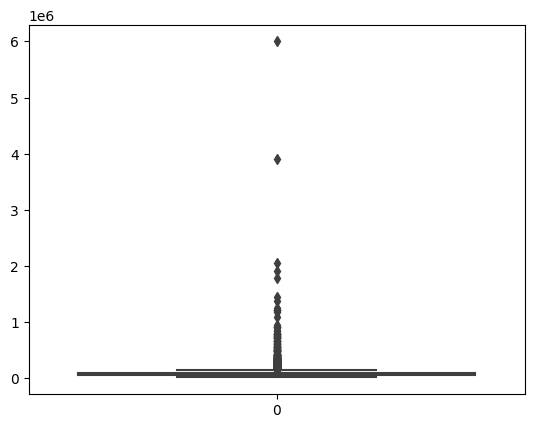

In [251]:
sns.boxplot(loan_data['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [261]:
quantile_info = filtered_loandata.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [263]:
per_95_annual_inc = filtered_loandata['annual_inc'].quantile(0.95)
filtered_loandata = filtered_loandata[filtered_loandata.annual_inc <= per_95_annual_inc]

<Axes: >

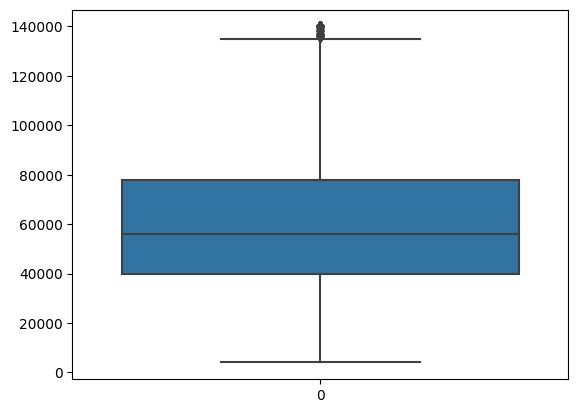

In [264]:
sns.boxplot(filtered_loandata.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv

<Axes: >

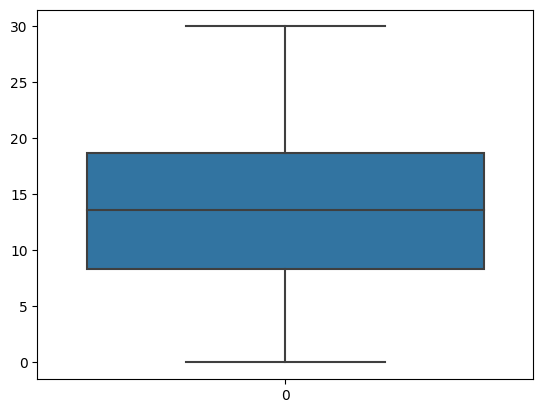

In [265]:
sns.boxplot(filtered_loandata.dti)

<Axes: >

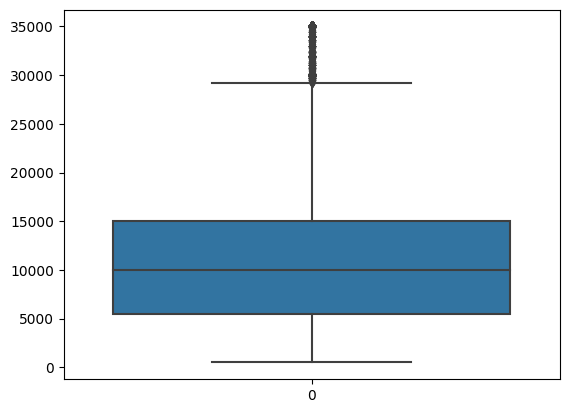

In [266]:
sns.boxplot(loan_data.loan_amnt)

In [268]:
filtered_loandata.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

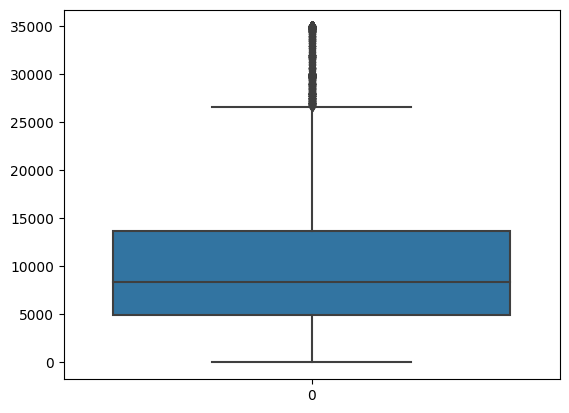

In [270]:
sns.boxplot(filtered_loandata.funded_amnt_inv)

In [271]:
filtered_loandata.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values for these above columns.

## Univariate Analysis

#### Most of the variables/columns are direclty dependant on the loan applications which are defaulted. The below are impacting mopre.
- Loan Amount
- Grades
- Interest Rate
- Annual Income
- Purpose
- Home Ownership
- Term

In [223]:
filtered_loandata.head()

,loan_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_perc,revol_util_perc,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,annual_inc_lakhs
0,5000.0,4975.0,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,Jan-85,1,3,0,9,f,0,1,INDIVIDUAL,0,0,0,0,36,10.65,83.70,Dec,11,Jan,85,24.000
1,2500.0,2500.0,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,Apr-99,5,3,0,4,f,0,1,INDIVIDUAL,0,0,0,0,60,15.27,9.40,Dec,11,Apr,99,30.000
2,2400.0,2400.0,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,Nov-01,2,2,0,10,f,0,1,INDIVIDUAL,0,0,0,0,36,15.96,98.50,Dec,11,Nov,01,12.252
3,10000.0,10000.0,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,Feb-96,1,10,0,37,f,0,1,INDIVIDUAL,0,0,0,0,36,13.49,21,Dec,11,Feb,96,49.200
5,5000.0,5000.0,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,11.20,Nov-04,3,9,0,12,f,0,1,INDIVIDUAL,0,0,0,0,36,7.90,28.30,Dec,11,Nov,04,36.000


In [224]:
#Getting the data by Loan status. Loan status is categorical variable.
filtered_loandata.loan_status.value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

**Inference** Most of the loans are fully paid. About 16-17% of loans are defaulted and 6-7% of loans are having status as Current

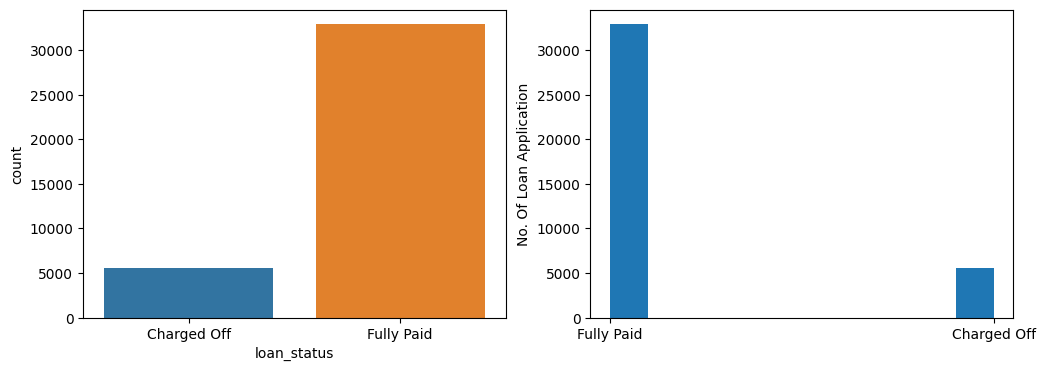

In [225]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x= filtered_loandata.loan_status)
plt.subplot(1,2,2)
plt.hist(filtered_loandata.loan_status)
plt.ylabel('No. Of Loan Application')
plt.show()

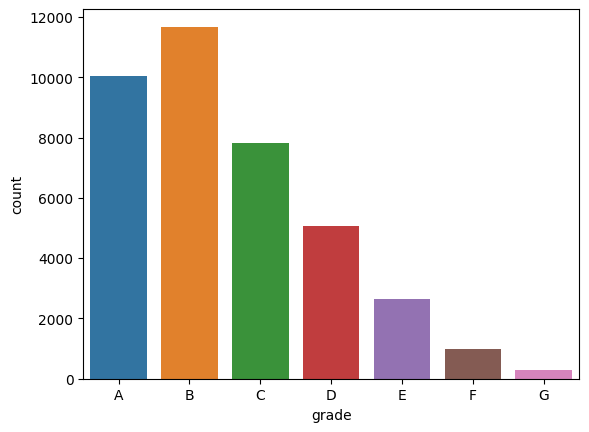

In [226]:
sns.countplot(x='grade', data=filtered_loandata)
plt.show()

**Inference**
Grade B and A are having highest values over 10000+ and above. Hence most of the loans fall under A and B grades.

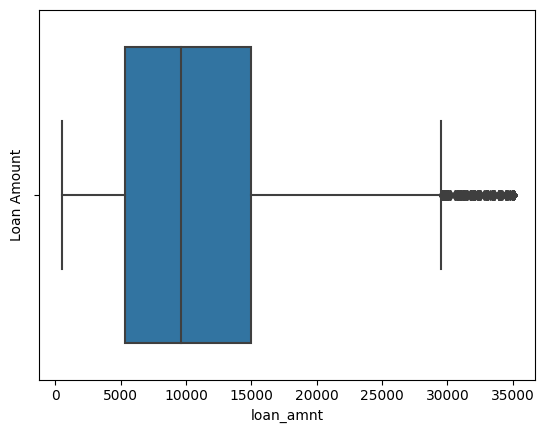

In [227]:
sns.boxplot(x=filtered_loandata.loan_amnt)
plt.ylabel('Loan Amount')
plt.show()

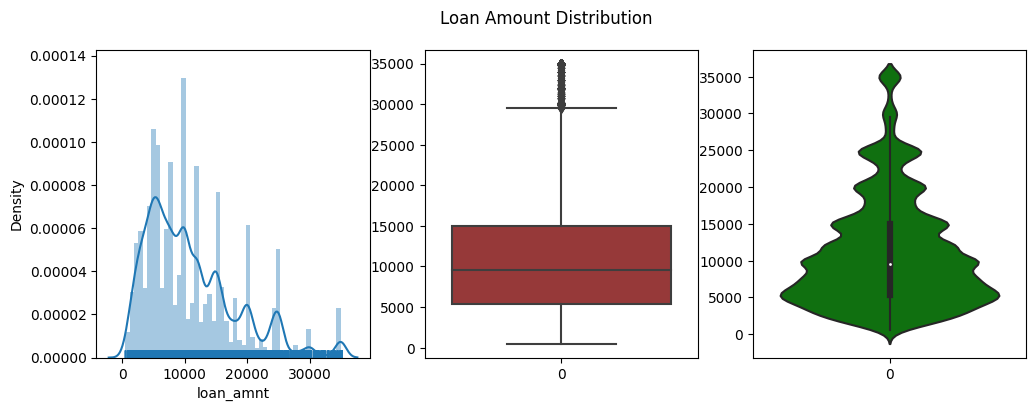

In [228]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,3,1)
#Histogram plot
sns.distplot(a=filtered_loandata.loan_amnt, rug=True)
plt.subplot(1,3,2)
#Box plot
sns.boxplot(data=filtered_loandata.loan_amnt, color='brown')
plt.subplot(1,3,3)
#Violin plot
sns.violinplot(filtered_loandata.loan_amnt, color='green')
#Single title for both subplots.
plt.suptitle('Loan Amount Distribution')
plt.show()

In [229]:
#Description of Interest Rate Percentage
filtered_loandata.int_rate_perc.describe()

count     38527
unique      370
top       10.99
freq        913
Name: int_rate_perc, dtype: object

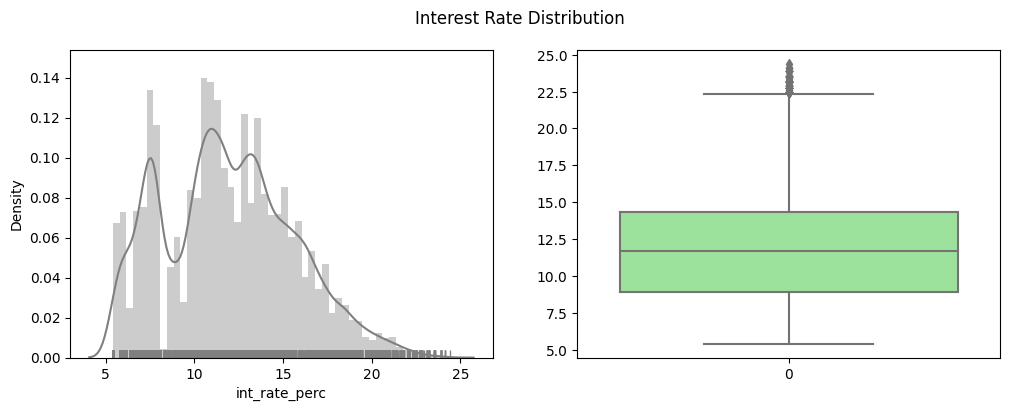

In [230]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=filtered_loandata.int_rate_perc, rug=True, color='gray')
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=filtered_loandata.int_rate_perc, color='lightgreen')
plt.suptitle('Interest Rate Distribution')
plt.show()

In [231]:
#Description of Term
filtered_loandata.term_months.describe()

count    38527.000000
mean        41.904223
std         10.336550
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term_months, dtype: float64

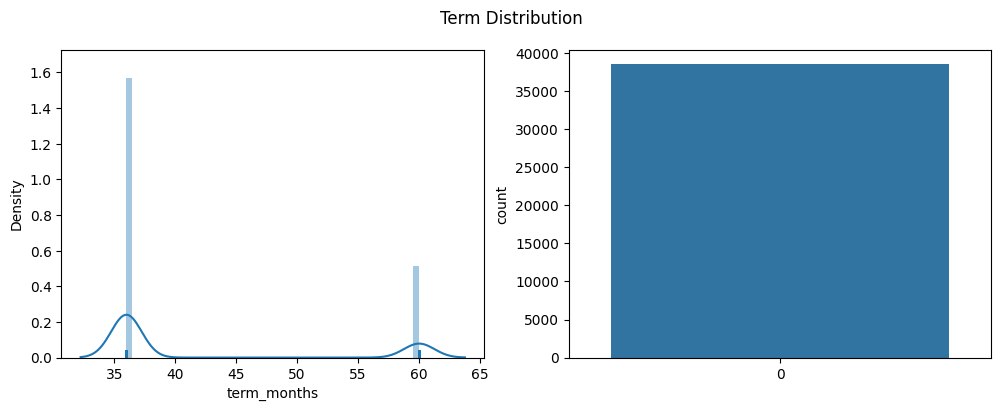

In [232]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=filtered_loandata.term_months, rug=True)
plt.subplot(1,2,2)
#Count plot
sns.countplot(filtered_loandata.term_months)
#Single title for both subplots.
plt.suptitle('Term Distribution')
plt.show()

**Inference**
The loan application with 36 months term is higher than 60 months.

In [233]:
#Description of House Ownership
filtered_loandata.home_ownership.describe()

count     38527
unique        5
top        RENT
freq      18448
Name: home_ownership, dtype: object

In [234]:
#Description of Purpose
filtered_loandata.purpose.describe()

count                  38527
unique                    14
top       debt_consolidation
freq                   18043
Name: purpose, dtype: object

In [235]:
filtered_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   38527 non-null  float64 
 1   funded_amnt_inv             38527 non-null  float64 
 2   installment                 38527 non-null  float64 
 3   grade                       38527 non-null  category
 4   sub_grade                   38527 non-null  category
 5   emp_length                  38527 non-null  object  
 6   home_ownership              38527 non-null  category
 7   annual_inc                  38527 non-null  float64 
 8   verification_status         38527 non-null  category
 9   issue_d                     38527 non-null  object  
 10  loan_status                 38527 non-null  category
 11  pymnt_plan                  38527 non-null  object  
 12  purpose                     38527 non-null  category
 13  dti             

### Analyzing by issued month and year


In [272]:
## Extracting month and year
df_month_year = filtered_loandata['issue_d'].str.partition("-", True)
filtered_loandata['issue_month']=df_month_year[0]
filtered_loandata['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

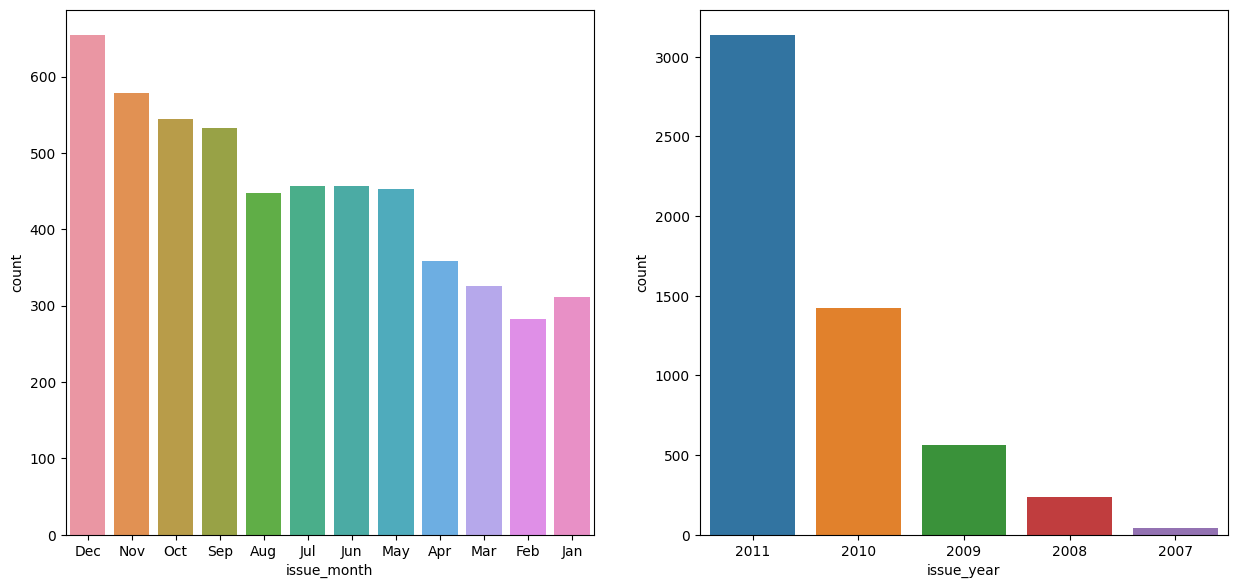

In [274]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=filtered_loandata[filtered_loandata['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=filtered_loandata[filtered_loandata['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years


# Segmented Analysis

In [238]:
filtered_loandata.groupby(filtered_loandata['loan_status'])['loan_amnt'].median()

loan_status
Charged Off    10000.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64

In [239]:
filtered_loandata.groupby(filtered_loandata['loan_status'])['loan_amnt'].mean()

loan_status
Charged Off    12123.556407
Fully Paid     10873.159710
Name: loan_amnt, dtype: float64

In [240]:
filtered_loandata.groupby(filtered_loandata['loan_status'])['int_rate_perc'].median()

loan_status
Charged Off    13.57
Fully Paid     11.49
Name: int_rate_perc, dtype: float64

In [241]:
filtered_loandata.groupby(filtered_loandata['loan_status'])['term_months'].mean()

loan_status
Charged Off    46.252718
Fully Paid     41.162960
Name: term_months, dtype: float64

In [242]:
filtered_loandata.groupby(filtered_loandata['loan_status'])['term_months'].median()

loan_status
Charged Off    36.0
Fully Paid     36.0
Name: term_months, dtype: float64

#Bivariate Analysis

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

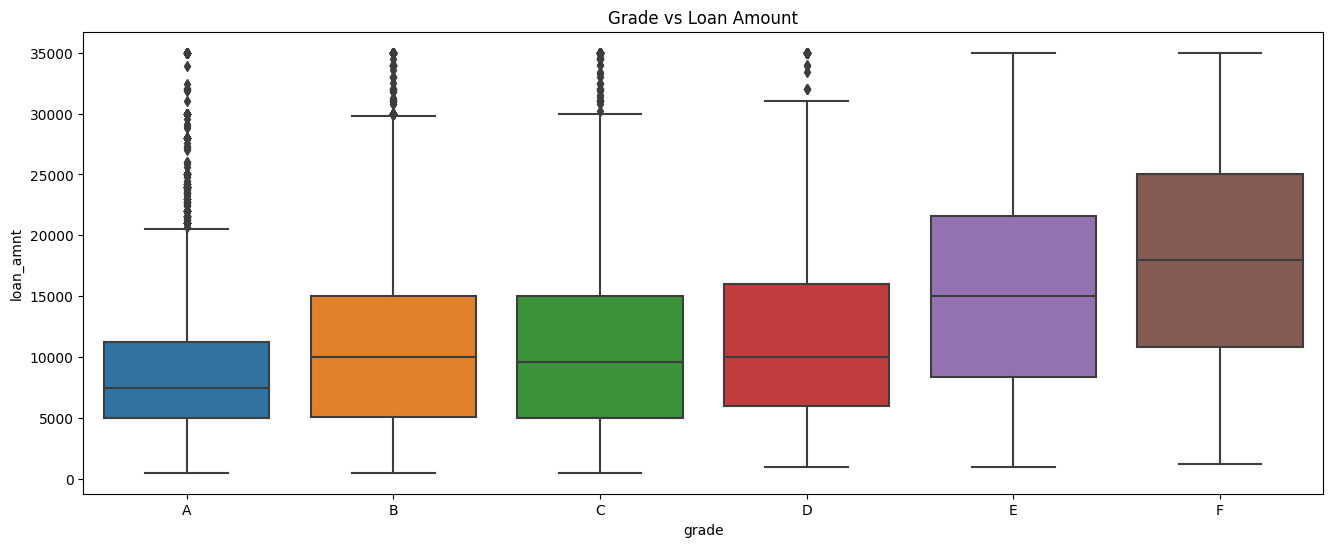

In [244]:
plt.figure(figsize=(16,6))
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = filtered_loandata.grade.unique()
sns.boxplot(x='grade', y=filtered_loandata.loan_amnt, order = ['A', 'B', 'C', 'D', 'E', 'F'], data=filtered_loandata)

## Analysing annual income with other columns for more insights


#### 1.Loan vs Loan purpose

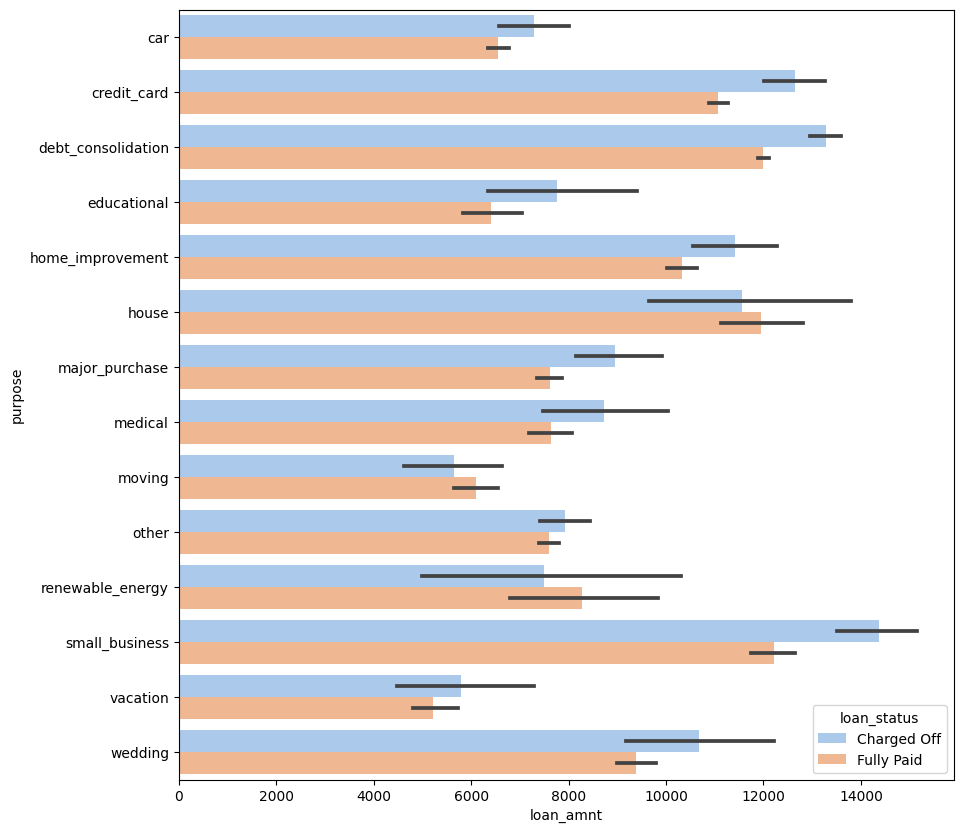

In [288]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_loandata,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 2.Loan vs House Ownership

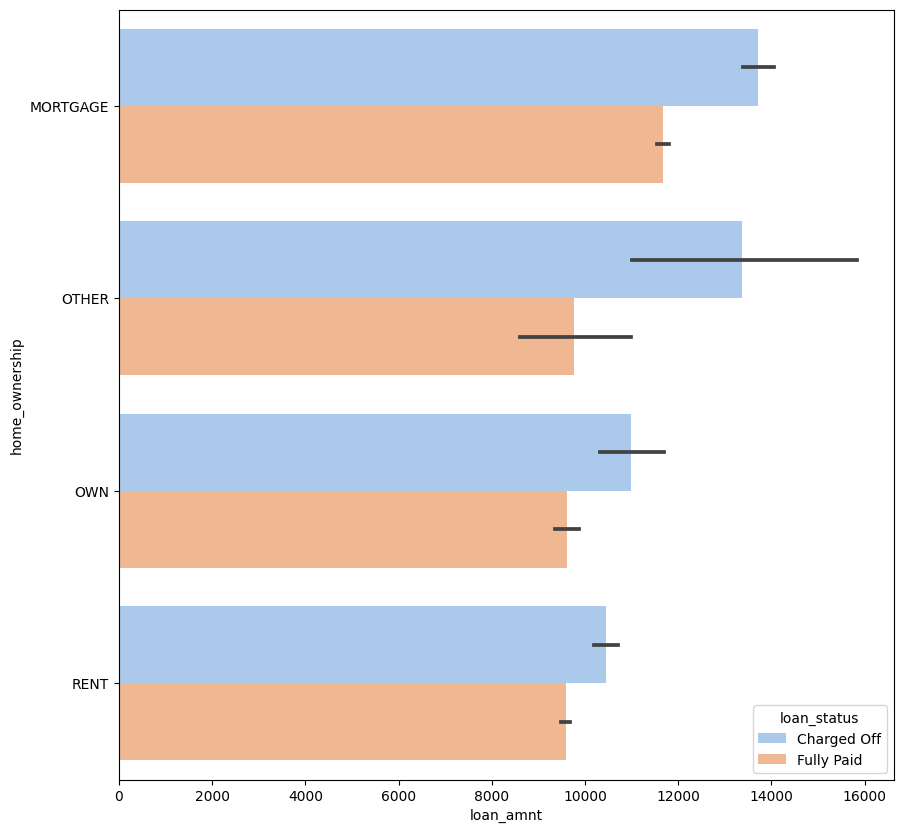

In [291]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_loandata,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### 3.Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

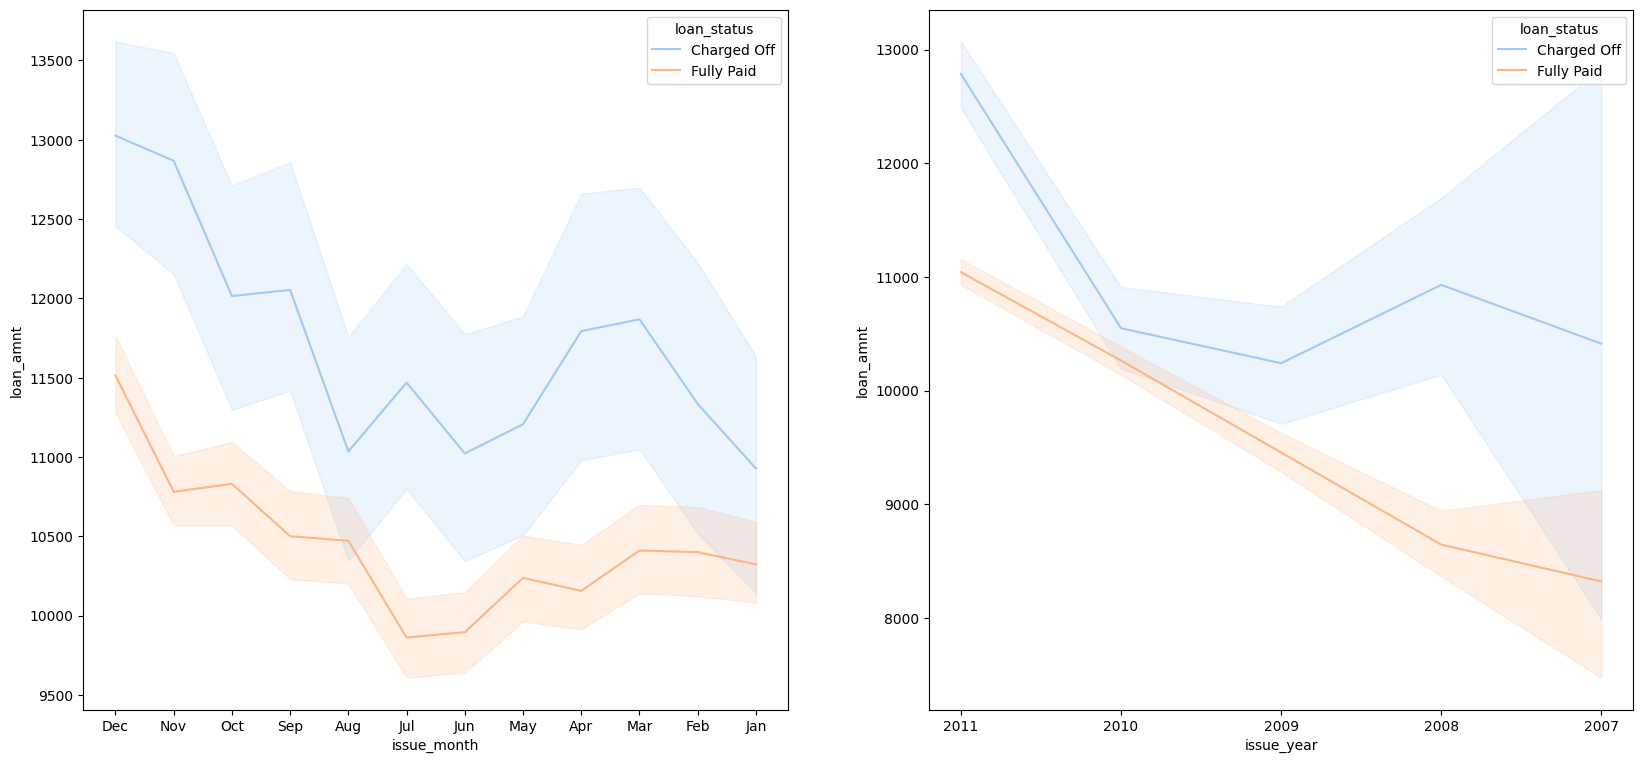

In [293]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =filtered_loandata,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =filtered_loandata,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


#### 4.Loan amount vs Grade

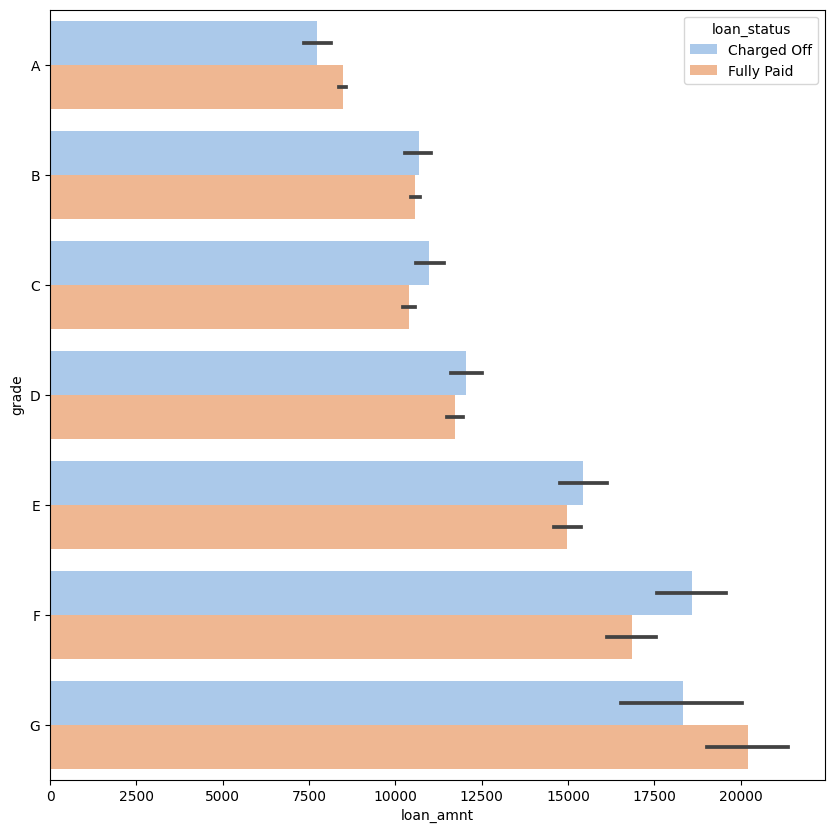

In [295]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_loandata,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

###5. annual income vs purpose

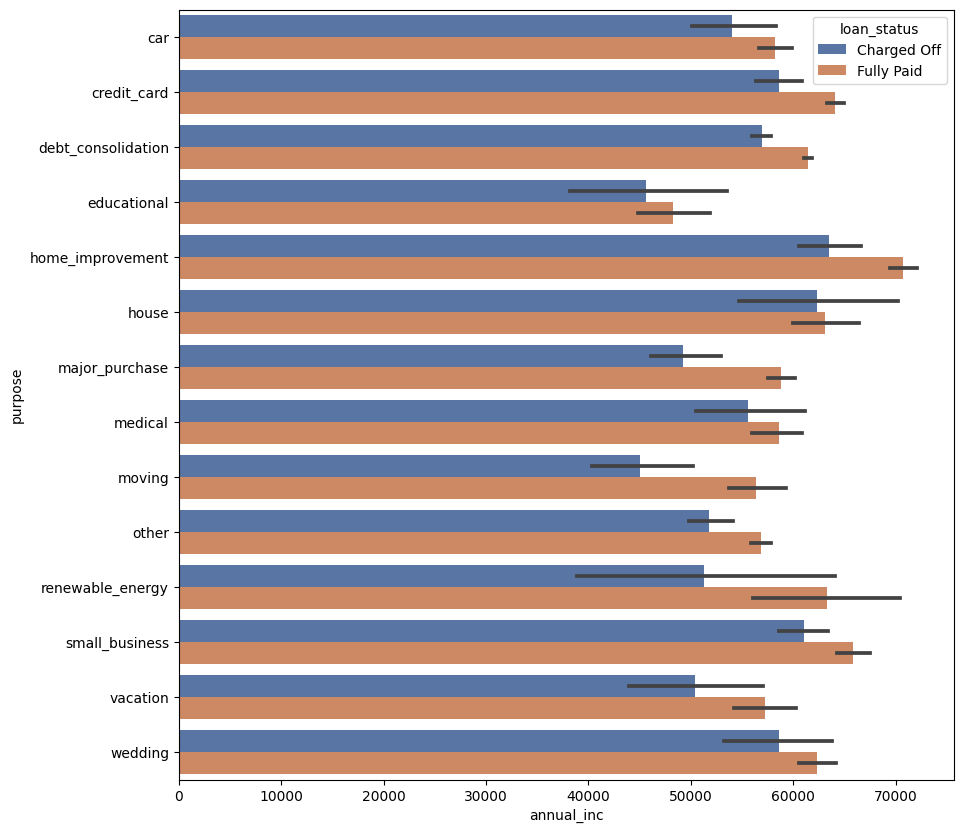

In [275]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_loandata,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

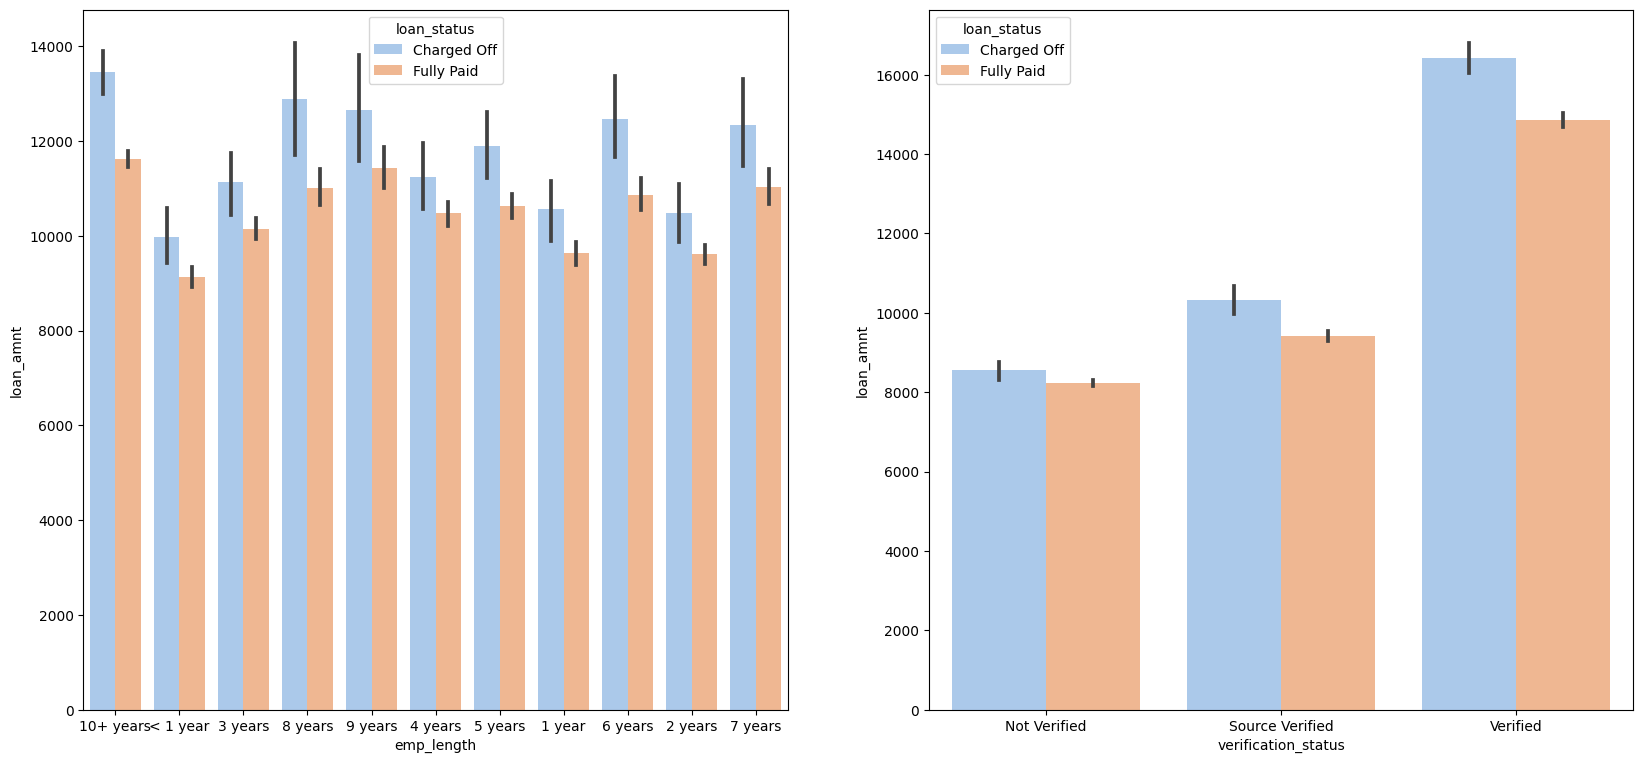

In [296]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =filtered_loandata,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =filtered_loandata,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


### Employees with longer working history got the loan approved for a higher amount.
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

### 6.Annual income vs home ownership

In [284]:
#replacing 'NONE' with 'OTHERS'
filtered_loandata['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

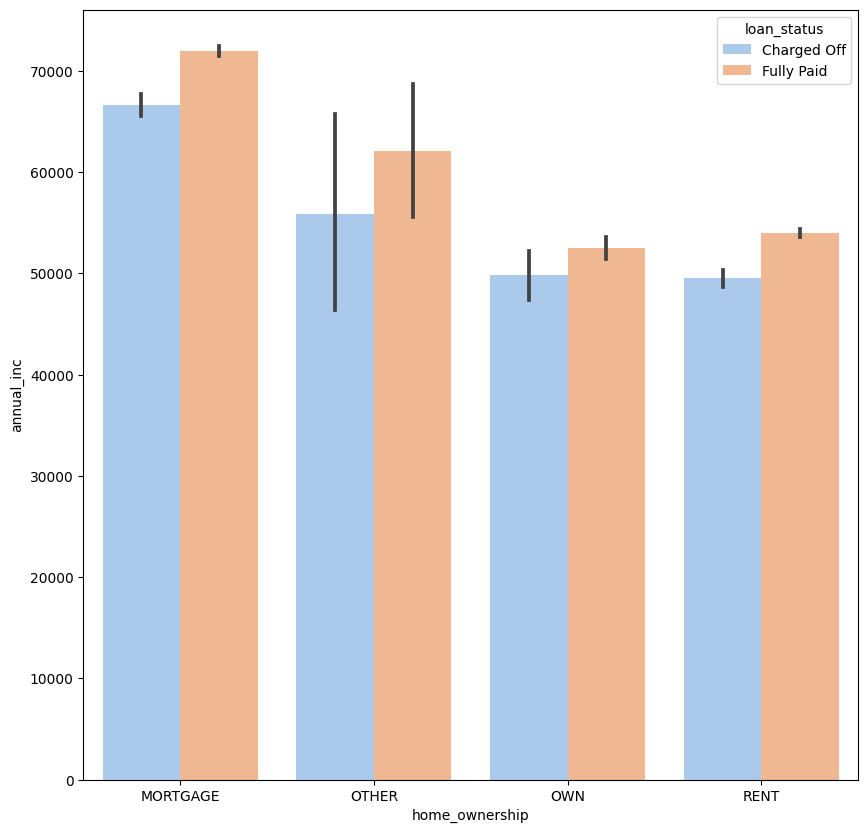

In [285]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_loandata,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Across all the income groups, the loan_amount is higher for people who defaulted.

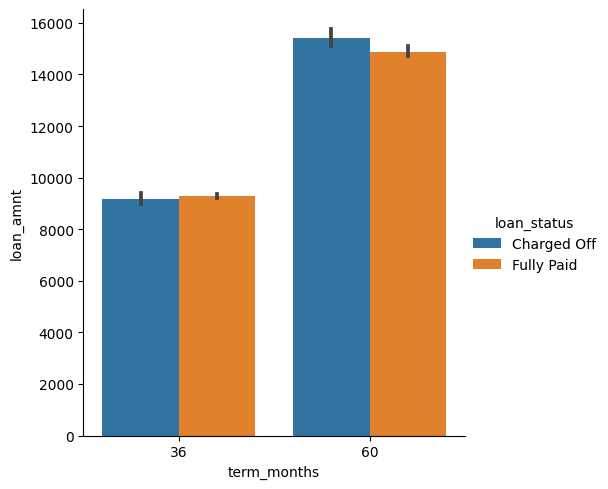

In [303]:
sns.catplot(x = 'term_months', y = 'loan_amnt', data = filtered_loandata,hue = 'loan_status', kind = 'bar')

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan.

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when :

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%

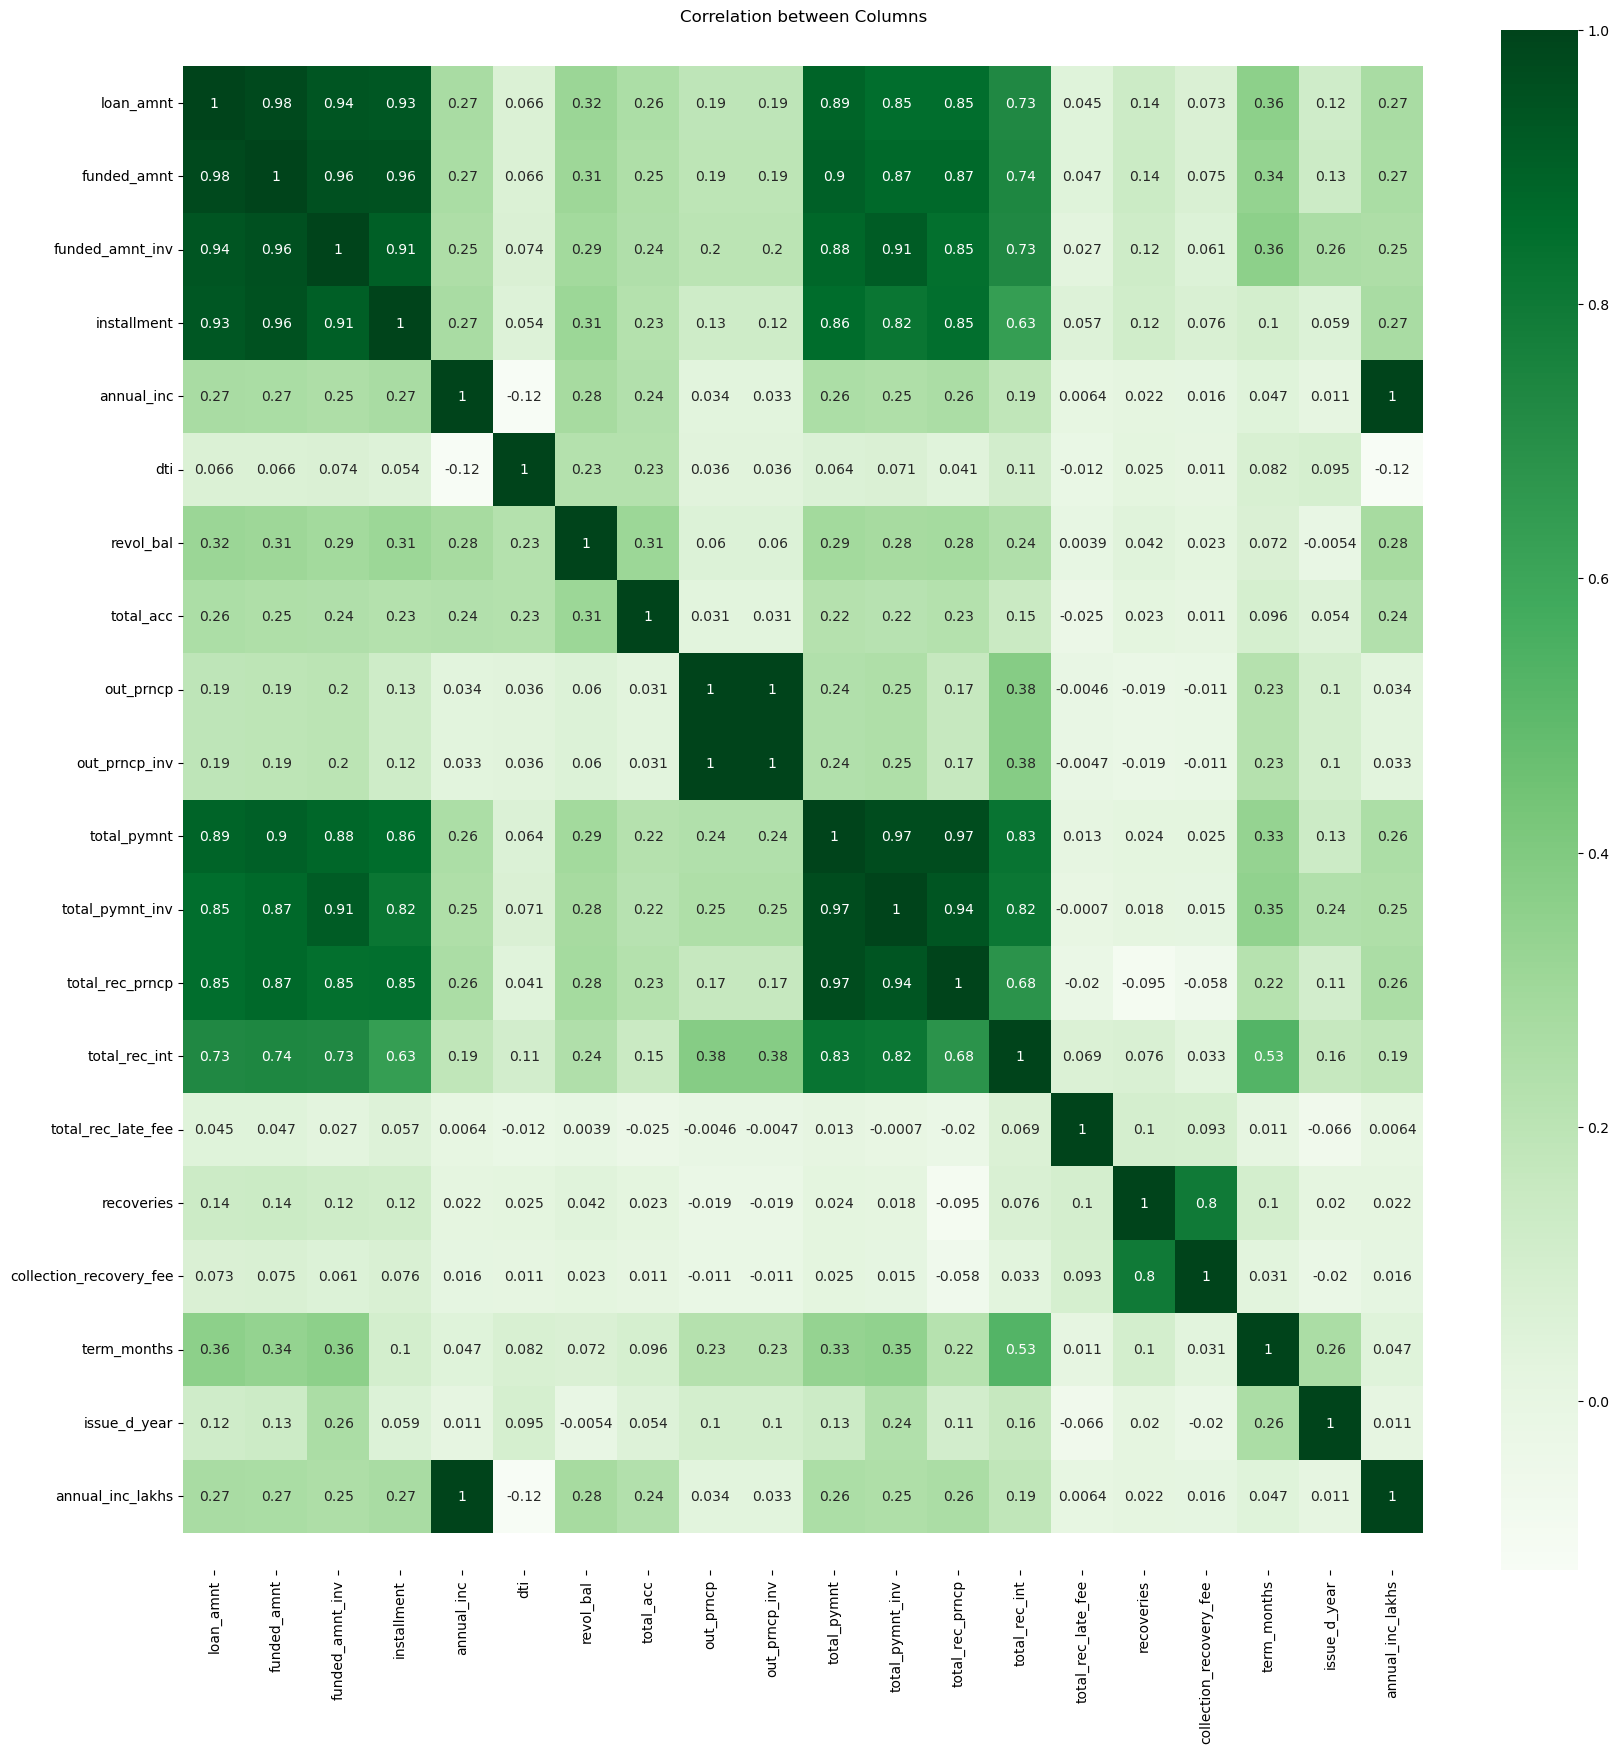

In [ ]:
#Finding correlation matric
corr_matrix = filtered_loandata.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()